# Uczenie maszynowe - laboratorium 0


## 3. Impoart IRIS, Wine and GLASS datasets


In [2]:
from ucimlrepo import fetch_ucirepo

### Import IRIS from ucimlrepo


In [30]:
iris = fetch_ucirepo(id=53)

iris.data.features.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Import Glass dataset from ucimlrepo


In [67]:
glass = fetch_ucirepo(id=42)

glass.data.features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### Import Wine dataset from ucimlrepo


In [32]:
wine = fetch_ucirepo(id=109)

wine.data.features.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 5. Wyrysowanie wykresu zależności długości/szerokości płatków Iris a klasą (z kolorem)


In [4]:
from pandas import DataFrame
from typing import NamedTuple, List, Dict, Any


# Type definitions to fix this library from:
# https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file#parameters
class UciMlData(NamedTuple):
    ids: DataFrame
    features: DataFrame
    targets: DataFrame
    original: DataFrame
    headers: List[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: Dict[str, Any]
    variables: DataFrame

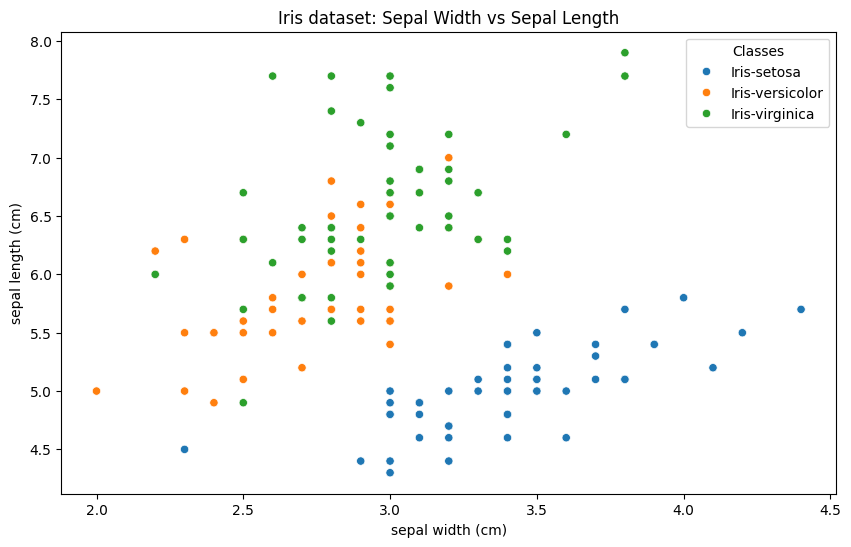

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

iris: UciMlDataset = fetch_ucirepo(id=53)

iris.data.features.head()

X = iris.data.features
y = iris.data.targets

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=X["sepal width"], y=X["sepal length"], hue=y["class"])
plt.title("Iris dataset: Sepal Width vs Sepal Length")
plt.legend(title="Classes")
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.show()